In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeRegressor

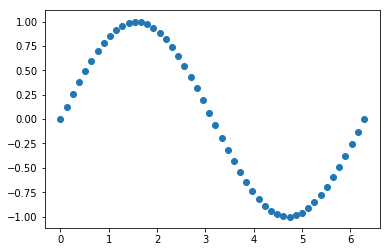

In [2]:
X = np.linspace(0,2*np.pi,50).reshape(-1,1)

y = np.sin(X)

plt.scatter(X,y)

[[-0.28581028]] [0.89789947]


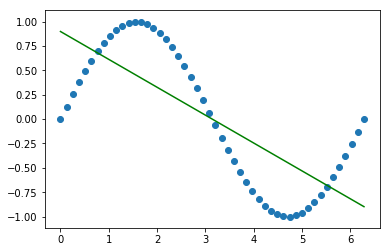

In [4]:
linear = LinearRegression()
linear.fit(X,y)
x = np.linspace(0,2*np.pi,150).reshape(-1,1)
y_ = linear.predict(x)
plt.scatter(X,y)
plt.plot(x,y_,color = 'green')
print(linear.coef_,linear.intercept_)

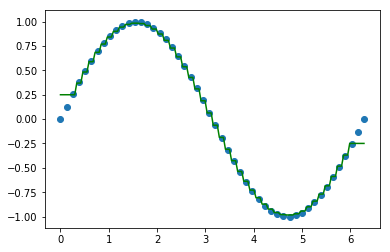

In [7]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X,y)
y_ = knn.predict(x)
plt.scatter(X,y)
plt.plot(x,y_,color = 'green')

In [9]:
# coef_线性方程的系数
# KNN回归不是方程，更像平均值，找5个邻居，计算5个邻居的平均值，穿过去
knn.coef_
knn.intercept_

AttributeError: 'KNeighborsRegressor' object has no attribute 'coef_'

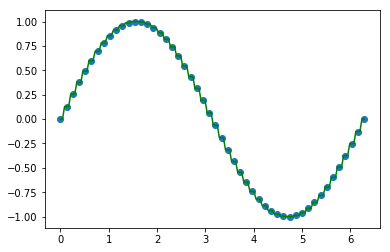

In [10]:
model = DecisionTreeRegressor()
model.fit(X,y)
y_ = model.predict(x)
plt.scatter(X,y)
plt.plot(x,y_,c = 'g')

In [11]:
model.coef_

AttributeError: 'DecisionTreeRegressor' object has no attribute 'coef_'

In [12]:
from sklearn import tree

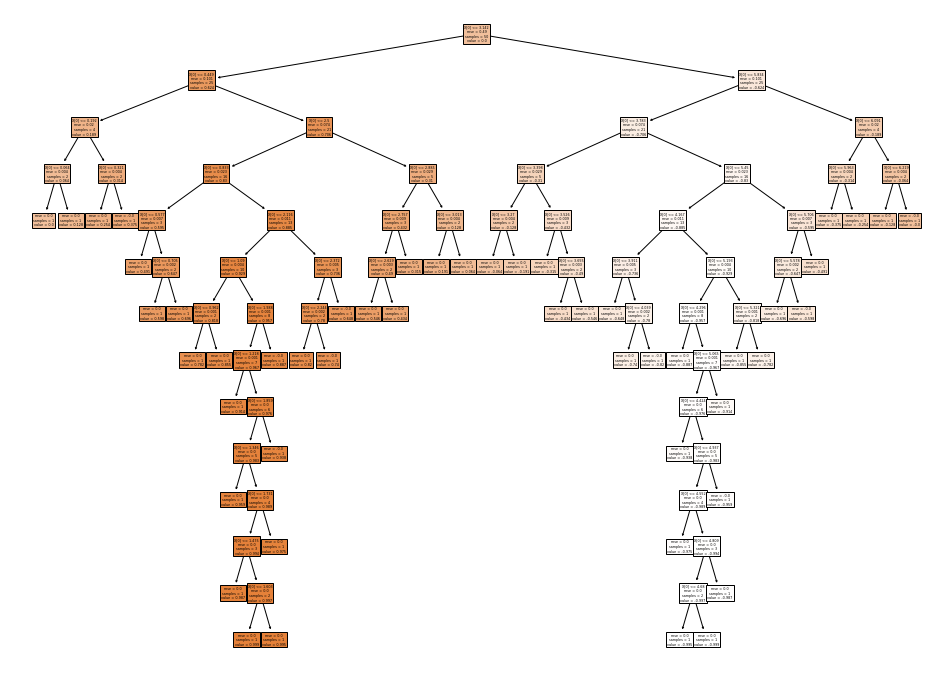

In [14]:
plt.figure(figsize=(16,12))
_ = tree.plot_tree(model,filled=True)

In [15]:
# 数据的范围宽
x = np.linspace(-np.pi,3*np.pi,200).reshape(-1,1)

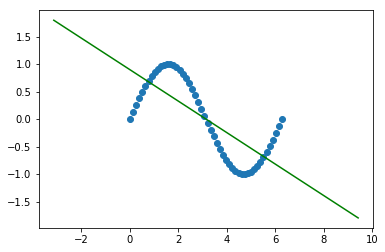

In [16]:
linear = LinearRegression()
linear.fit(X,y)
y_ = linear.predict(x)
plt.scatter(X,y)
plt.plot(x,y_,c = 'g')

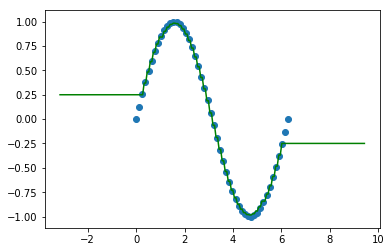

In [17]:
knn = KNeighborsRegressor()
knn.fit(X,y)
y_ = knn.predict(x)
plt.scatter(X,y)
plt.plot(x,y_,c = 'g')

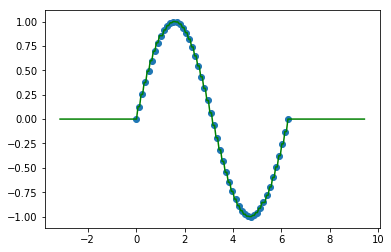

In [18]:
dt = DecisionTreeRegressor()
dt.fit(X,y)
y_ = dt.predict(x)
plt.scatter(X,y)
plt.plot(x,y_,c = 'g')

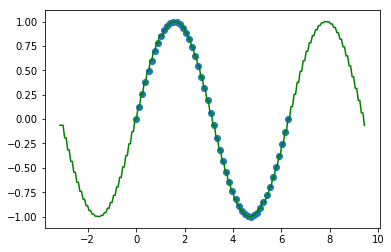

In [20]:
# 测试数据进行数据清洗，研究规律，周期性2pi，还原
dt = DecisionTreeRegressor()
dt.fit(X,y)

# !!!数据预处理
pre_x = x.copy()
cond = pre_x > 2*np.pi
pre_x[cond] -= 2*np.pi

cond2 = pre_x < 0
pre_x[cond2] += 2*np.pi

y_ = dt.predict(pre_x)
plt.scatter(X,y)
plt.plot(x,y_,c = 'g')

In [21]:
f = lambda x :(x-3)**2 +3.6*x + 2.718

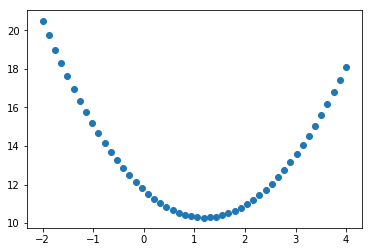

In [24]:
X = np.linspace(-2,4,50).reshape(-1,1)

y = f(X)

plt.scatter(X,y)

In [25]:
X = np.concatenate([X**2,X],axis = 1)
X.shape

(50, 2)

In [26]:
# 测试数据的范围，超过了训练数据（-2,4）
X_test = np.linspace(-4,8,200).reshape(-1,1)

X_test = np.concatenate([X_test**2,X_test],axis = 1)
X_test.shape

(200, 2)

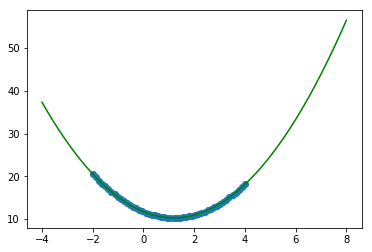

In [27]:
linear =LinearRegression()

linear.fit(X,y)

y_ = linear.predict(X_test)

plt.scatter(X[:,1],y)

plt.plot(X_test[:,1],y_,c = 'g')

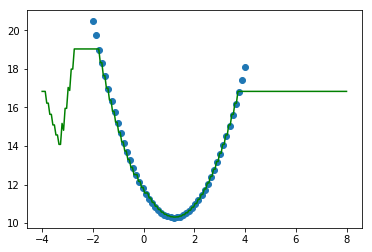

In [28]:
knn = KNeighborsRegressor()

knn.fit(X,y)

# KNN模型废，数据不是周期
y_ = knn.predict(X_test)
plt.scatter(X[:,1],y)

plt.plot(X_test[:,1],y_,c = 'g')

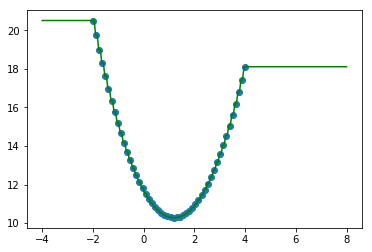

In [29]:
dt = DecisionTreeRegressor()

dt.fit(X,y)

y_ = dt.predict(X_test)
plt.scatter(X[:,1],y)

plt.plot(X_test[:,1],y_,c = 'g')